In [29]:
import numpy as np
import healpy as hp
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.table import Table, Column
from matplotlib_venn import venn2
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline

In [30]:
# use a standard way to read, like Table.read
print 'Reading files'
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data
k = Table.read('koester2007.vot', format='votable')
print 'Wen:',len(w)
print 'Rykoff:',len(r)
print 'Koester:', len(k)

Reading files
Wen: 132684
Rykoff: 26111
Koester: 13823


In [31]:
NSIDE = 32

In [32]:
# Phi e theta do Wen
phi_w = np.deg2rad(w['RAJ2000'])
theta_w = np.deg2rad(90.-w['DEJ2000'])

In [33]:
#Phi e theta do Rykoff
phi_r = np.deg2rad(r['RA'])
theta_r = np.deg2rad(90.-r['DEC'])

In [34]:
#Phi e theta do Koester
phi_k = np.deg2rad(k['RAJ2000'])
theta_k = np.deg2rad(90.-k['DEJ2000'])

In [35]:
# Pixels do Wen
wpix = hp.ang2pix(NSIDE, theta_w, phi_w)
n = np.arange(hp.nside2npix(NSIDE))

In [36]:
# Pixels do Rykoff
rpix = hp.ang2pix(NSIDE, theta_r, phi_r)
#m = np.arange(hp.nside2npix(NSIDE))

In [37]:
#Pixels do Koester
kpix = hp.ang2pix(NSIDE, theta_k, phi_k)
#l = np.arange(hp.nside2npix(NSIDE))

In [38]:
#Retira os numeros de pixels repetidos
uwpix = np.unique(wpix)
urpix = np.unique(rpix)
ukpix = np.unique(kpix)
print len(wpix), len(uwpix)
print len(rpix), len(urpix)
print len(kpix), len(ukpix)

132684 4900
26111 3288
13823 2379


In [39]:
# Match de wpix com rpix
lista = []
for wp in uwpix: 
    for rp in urpix:
        if wp==rp:
            lista.append(wp)

In [40]:
print len(lista)

3288


In [41]:
#Match da lista com o kpix
lista_m = []
for kp in ukpix:
    for lp in lista:
        if lp==kp:
            lista_m.append(kp)

In [42]:
print len(lista_m)

2311


In [43]:
#sysmap = np.zeros(hp.nside2npix(NSIDE),dtype=np.float32) +hp.UNSEEN
mmap = np.zeros(hp.nside2npix(NSIDE), dtype=np.int8) + hp.UNSEEN

In [44]:
mmap[lista_m] = 1

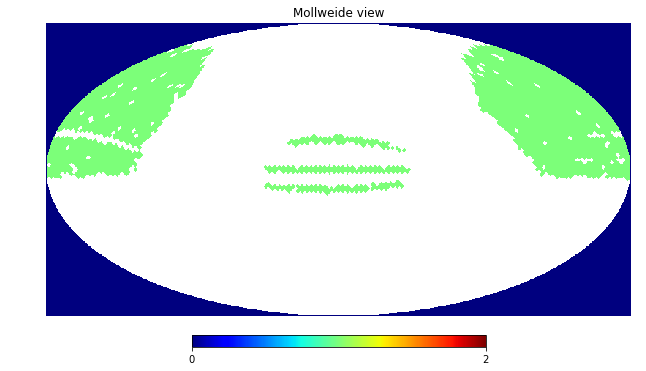

In [45]:
# plot originals for comparison
hp.mollview(mmap, fig=4, cmap='jet')

In [48]:
match = hp.pix2ang(NSIDE, lista_m)
# Transforma de radiano para graus
phi = match[1]
theta = match[0]
phi = np.rad2deg(phi)
theta = 90 - np.rad2deg(theta)
print max(theta), max(phi)
print min(theta), min(phi)

67.934928649 358.59375
-12.0246991806 0.0


In [141]:
# wen
mask_w = np.zeros(len(wpix), int)
goodies = np.array(lista_m)
for i,wp in enumerate(wpix):
    for good in goodies:
        if wp == good:
            mask_w[i] = 1

In [142]:
print mask_w
print len(mask_w), sum(mask_w)

[0 0 0 ..., 1 0 0]
132684 80917


In [147]:
match_iw = []
for i in range(0,len(mask_w)):
    if mask_w[i]!=0:
        match_iw.append(i)
print len(match_iw)

80917


In [182]:
# Aplicando os indices no wen
new_w = w[match_iw]

In [183]:
# rykoff
mask_r = np.zeros(len(rpix), int)
goodies = np.array(lista_m)
for i,rp in enumerate(rpix):
    for good in goodies:
        if rp == good:
            mask_r[i] = 1 

In [184]:
print mask_r
print len(mask_r), sum(mask_r)

[1 1 1 ..., 1 1 1]
26111 18758


In [185]:
match_ir = []
for i in range(0,len(mask_r)):
    if mask_r[i]!=0:
        match_ir.append(i)
print len(match_ir)

18758


In [186]:
# Aplicando os indices no rykoff
new_r = r[match_ir]

In [187]:
# koester
mask_k = np.zeros(len(kpix), int)
goodies = np.array(lista_m)
for i,kp in enumerate(kpix):
    for good in goodies:
        if kp == good:
            mask_k[i] = 1 

In [188]:
print mask_k
print len(mask_k), sum(mask_k)

[1 1 1 ..., 1 1 1]
13823 13611


In [189]:
match_ik = []
for i in range(0,len(mask_k)):
    if mask_k[i]!=0:
        match_ik.append(i)
print len(match_ik)

13611


In [190]:
# Aplicando os indices no koester
new_k = k[match_ik]

In [191]:
np.save('new_w.fits', new_w)

In [192]:
np.save('new_r.fits', new_r)

In [193]:
np.save('new_k.fits', new_k)